# Rain Forecasting with ANN

referensi: https://www.kaggle.com/fatmakursun/rain-forecasting-with-artificial-neural-network

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

Memasukkan dan Menapilkan Data

pada bagian ini data csv akan dimasukkan dan ditampilkan 5 baris pertama dari seluruh data.

In [2]:
df= pd.read_csv('../UAS/seattleWeather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


MENAMPILKAN GRAFIK

hasil dari grafik ini didapatkan dari data TMAX yang terdapat pada dataset yang telah dimasukkan.

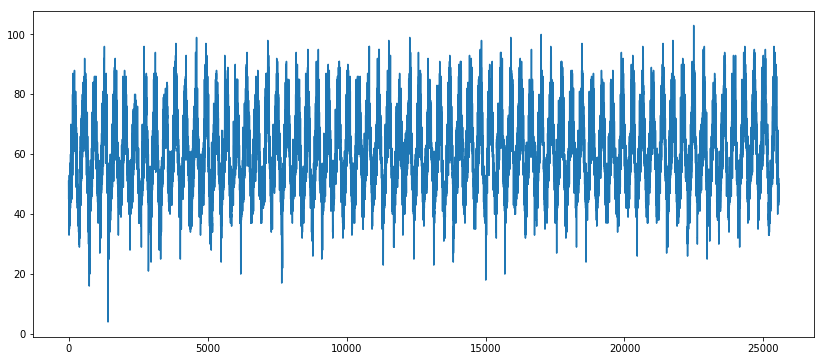

In [3]:
plt.figure(figsize=(14,6))
df['TMAX'].plot()

BOX PLOT

grafik di bawah ini didapatkan dari data RAIN dan TMAX yang merupakan data dari dataset dimana RAIN sebagai x dan TMAX sebagai y.

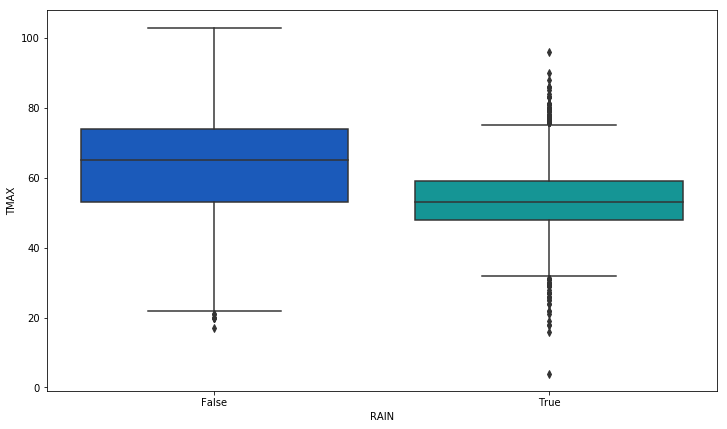

In [4]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='RAIN',y='TMAX',data=df,palette='winter')

GRAFIK BATANG

grafik batang di bawah ini menampilkan data dari PRCP yang terdapat dalam dataset.

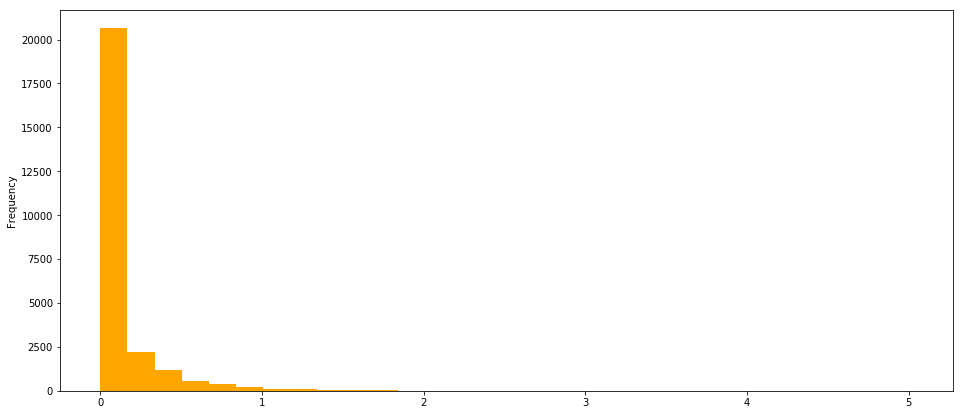

In [5]:
df['PRCP'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))

Mengkonversikan kolom 'rain' ke ann dalam bentuk numeric

In [6]:
df['rain']=[1 if i==True else 0 for i in df['RAIN']]

In [7]:
from sklearn.model_selection import train_test_split

bagian di bawah ini akan menampilkan kolom yang terdapat pada dataset.

In [8]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'rain'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
rain    25551 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [10]:
df.dropna(inplace=True)

bagian di bawah ini akan menjadikan PRCP, TMAX, dan TMIN dari dataset sebagai variabel x dan rain sebagai variabel y.

In [11]:
X=df[['PRCP','TMAX','TMIN']]
y=df[['rain']]

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split (X,y,test_size=0.2, random_state=41)

Normalisasi Nilai X

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Membuat Model ANN

In [14]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


berdasarkan program di bawah dapat diketahui bahwa terdapat 2 hidden layer pada dataset kali ini dengan activation yang digunakan adalah rel u dan activation sigmoin untuk output

In [15]:
ann  = Sequential()
ann.add(Dense(units= 32,init= 'uniform', activation = 'relu', input_dim=3))
ann.add(Dense(units= 16,init= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,init= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, activation="relu", input_dim=3, kernel_initializer="uniform")`
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


TRAINING

pada bagian ini data akan ditraining selama 10 kali dan terdapat beberapa hasil training yang menghasilkan angka 1.

In [16]:
ann.fit(xtrain,ytrain, batch_size=10, nb_epoch=10,verbose= 1)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
20438/20438 [==============================] - 5s 255us/step - loss: 0.0517 - accuracy: 0.9429
Epoch 2/10
20438/20438 [==============================] - 5s 223us/step - loss: 0.0079 - accuracy: 0.9949
Epoch 3/10
20438/20438 [==============================] - 4s 215us/step - loss: 0.0012 - accuracy: 0.99991s - loss: 0.0016 - accuracy: 0.99 - ETA: 1s - - ETA: 0s - loss: 0
Epoch 4/10
20438/20438 [==============================] - 5s 223us/step - loss: 2.0845e-04 - accuracy: 1.0000
Epoch 5/10
20438/20438 [==============================] - 5s 220us/step - loss: 0.0019 - accuracy: 0.9980
Epoch 6/10
20438/20438 [==============================] - 5s 244us/step - loss: 3.2368e-05 - accuracy: 1.0000
Epoch 7/10
20438/20438 [==============================] - 5s 236us/step - loss: 2.8138e-05 - accuracy: 1.0000
Epoch 8/10
20438/20438 [==============================] - 5s 243us/step - loss: 0.0017 - accuracy: 0.9982
Epoch 9/10
20438/20438 [==============================] - 4s 208us/step - 

In [17]:
Y_pred = ann.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 

CONFUSION MATRIX

terdapat empat istilah pada confusion matrix yaitu True Positive, False Positive, False Negative, True Negative. berdasarkan output di bawah, maka:
True Positive = 2928 
False Positive = 0
False Negative = 0
True Negative = 2182

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Y_pred)
print(cm)

[[2928    0]
 [   0 2182]]


terima kasih